In [74]:
import warnings
warnings.filterwarnings("ignore", message=r"Passing", category=FutureWarning)

import tensorflow as tf
import pandas as pd
from scipy.io import loadmat
import numpy as np

In [130]:
DIR_PATH = 'D:/DataSets/Emotic/emotic'

path_annotation = 'D:/DataSets/Emotic/Annotations/Annotations.mat'
annots = loadmat(path_annotation)
SAVE_DIR= 'J:/Emotion/emoticProcessed'

In [76]:
annots.keys()

dict_keys(['__header__', '__version__', '__globals__', 'test', 'train', 'val'])

In [77]:
annots['train'][0][0][3]

array([[(array(['mscoco'], dtype='<U6'), array([[(array([[562243]]), array([[448867]]))]],
              dtype=[('image_id', 'O'), ('annotations_id', 'O')]))                        ]],
      dtype=[('name', 'O'), ('info', 'O')])

In [78]:
file_names,\
folder_names,\
n_col,\
n_row,\
person_bbox_x,\
person_bbox_y,\
person_bbox_w,\
person_bbox_h,\
Emotions_Categorical,\
Emotions_Continuous_valance,\
Emotions_Continuous_arousal,\
Emotions_Continuous_dominance,\
genders,\
ages=[],[],[],[],[],[],[],[],[],[],[],[],[],[]


In [181]:
line = annots['train'][0][0]
 
(line[4][0][0].flat[0][0])

array([[ 86,  58, 564, 628]], dtype=uint16)

In [80]:
file_names,\
folder_names,\
n_col,\
n_row,\
person_bbox_x,\
person_bbox_y,\
person_bbox_w,\
person_bbox_h,\
Emotions_Categorical,\
Emotions_Continuous_valance,\
Emotions_Continuous_arousal,\
Emotions_Continuous_dominance,\
genders,\
ages=[],[],[],[],[],[],[],[],[],[],[],[],[],[]

for line in annots['train'][0]:
    file_names.append(line[0].flat[0])
    folder_names.append(line[1].flat[0])
    n_col.append(line[2][0][0][0].flat[0])
    n_row.append(line[2][0][0][1].flat[0])
    person_bbox_x.append((line[4][0][0].flat[0][0])[0][0])
    person_bbox_y.append((line[4][0][0].flat[0][0])[0][1])
    person_bbox_w.append((line[4][0][0].flat[0][0])[0][2])
    person_bbox_h.append((line[4][0][0].flat[0][0])[0][3])
    Emotions_Categorical.append(
        [
            emotion_cat.flat[0] for emotion_cat in (line[4][0][0].flat[0])[1].flat[0][0][0]
        ]
    )

    Emotions_Continuous_arousal.append(((line[4][0][0].flat[0])[2])[0][0][1].flat[0])
    Emotions_Continuous_dominance.append(((line[4][0][0].flat[0])[2])[0][0][2].flat[0])
    Emotions_Continuous_valance.append([emotion_cont.flat[0] for emotion_cont in (line[4][0][0].flat[0])[2].flat[0]])
    genders.append((line[4][0][0].flat[0])[3].flat[0])
    ages.append((line[4][0][0].flat[0])[4].flat[0])
    
#data= list(zip(file_names,folder_names,n_col,n_row,person_bbox,Emotions_Categorical,Emotions_Continuous,genders,ages))



In [81]:
Emotions_Categorical[1]

['Anticipation']

In [82]:
data= list(zip(
    file_names,
    folder_names,
    n_col,
    n_row,
    person_bbox_x,
    person_bbox_y,
    person_bbox_w,
    person_bbox_h,
    Emotions_Categorical,
    Emotions_Continuous_valance,
    Emotions_Continuous_arousal,
    Emotions_Continuous_dominance,
    genders,
    ages
))

columns= [
    'file_names',
    'folder_names',
    'n_col',
    'n_row',
    'person_bbox_x1',
    'person_bbox_y1',
    'person_bbox_x2',
    'person_bbox_y2',
    'Emotions_Categorical',
    'Emotions_Continuous_valence',
    'Emotions_Continuous_arousal',
    'Emotions_Continuous_dominance',
    'genders',
    'ages'
]

df_train = pd.DataFrame(data, columns=columns)
df_train

,file_names,folder_names,n_col,n_row,person_bbox_x1,person_bbox_y1,person_bbox_x2,person_bbox_y2,Emotions_Categorical,Emotions_Continuous_valence,Emotions_Continuous_arousal,Emotions_Continuous_dominance,genders,ages
0,COCO_val2014_000000562243.jpg,mscoco/images,640,640,86.0,58.0,564.0,628.0,"[Disconnection, Doubt/Confusion]","[5, 3, 9]",3.0,9.0,Male,Adult
1,COCO_train2014_000000288841.jpg,mscoco/images,640,480,485.0,149.0,605.0,473.0,[Anticipation],"[6, 4, 7]",4.0,7.0,Male,Adult
2,COCO_val2014_000000558171.jpg,mscoco/images,640,480,305.0,92.0,461.0,465.0,"[Engagement, Excitement, Happiness]","[7, 8, 8]",8.0,8.0,Male,Teenager
3,COCO_train2014_000000369575.jpg,mscoco/images,480,640,221.0,63.0,448.0,372.0,"[Aversion, Pleasure]","[8, 9, 8]",9.0,8.0,Male,Kid
4,COCO_train2014_000000213009.jpg,mscoco/images,500,333,44.0,143.0,150.0,288.0,"[Confidence, Excitement]","[7, 9, 10]",9.0,10.0,Male,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,COCO_val2014_000000203781.jpg,mscoco/images,640,480,189.0,194.0,323.0,438.0,"[Anticipation, Engagement]","[6, 5, 3]",5.0,3.0,Male,Adult
17073,COCO_train2014_000000175368.jpg,mscoco/images,500,375,214.0,48.0,340.0,326.0,[Confidence],"[7, 8, 7]",8.0,7.0,Male,Adult
17074,COCO_val2014_000000514083.jpg,mscoco/images,640,480,166.0,35.0,341.0,401.0,"[Anticipation, Engagement, Excitement]","[6, 2, 10]",2.0,10.0,Male,Adult
17075,frame_k7fb824vh221kl3j.jpg,framesdb/images,500,375,245.0,227.0,293.0,340.0,[Engagement],"[5, 5, 6]",5.0,6.0,Male,Adult


In [83]:
NanIndexes = []
for i in range(df_train.shape[0]):
    if df_train['Emotions_Continuous_valence'].isnull().iloc[i]:
        NanIndexes.append(i)
indexes_to_keep = set(range(df_train.shape[0])) - set(NanIndexes)
df_train = df_train.take(list(indexes_to_keep))

df_train.reset_index(drop=True, inplace=True)
df_train

,file_names,folder_names,n_col,n_row,person_bbox_x1,person_bbox_y1,person_bbox_x2,person_bbox_y2,Emotions_Categorical,Emotions_Continuous_valence,Emotions_Continuous_arousal,Emotions_Continuous_dominance,genders,ages
0,COCO_val2014_000000562243.jpg,mscoco/images,640,640,86.0,58.0,564.0,628.0,"[Disconnection, Doubt/Confusion]","[5, 3, 9]",3.0,9.0,Male,Adult
1,COCO_train2014_000000288841.jpg,mscoco/images,640,480,485.0,149.0,605.0,473.0,[Anticipation],"[6, 4, 7]",4.0,7.0,Male,Adult
2,COCO_val2014_000000558171.jpg,mscoco/images,640,480,305.0,92.0,461.0,465.0,"[Engagement, Excitement, Happiness]","[7, 8, 8]",8.0,8.0,Male,Teenager
3,COCO_train2014_000000369575.jpg,mscoco/images,480,640,221.0,63.0,448.0,372.0,"[Aversion, Pleasure]","[8, 9, 8]",9.0,8.0,Male,Kid
4,COCO_train2014_000000213009.jpg,mscoco/images,500,333,44.0,143.0,150.0,288.0,"[Confidence, Excitement]","[7, 9, 10]",9.0,10.0,Male,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,COCO_val2014_000000203781.jpg,mscoco/images,640,480,189.0,194.0,323.0,438.0,"[Anticipation, Engagement]","[6, 5, 3]",5.0,3.0,Male,Adult
17073,COCO_train2014_000000175368.jpg,mscoco/images,500,375,214.0,48.0,340.0,326.0,[Confidence],"[7, 8, 7]",8.0,7.0,Male,Adult
17074,COCO_val2014_000000514083.jpg,mscoco/images,640,480,166.0,35.0,341.0,401.0,"[Anticipation, Engagement, Excitement]","[6, 2, 10]",2.0,10.0,Male,Adult
17075,frame_k7fb824vh221kl3j.jpg,framesdb/images,500,375,245.0,227.0,293.0,340.0,[Engagement],"[5, 5, 6]",5.0,6.0,Male,Adult


In [84]:
emotic_categorie_classes = [
    'Affection',
    'Anger',
    'Annoyance',
    'Anticipation',
    'Aversion',
    'Confidence',
    'Disapproval',
    'Disconnection',
    'Disquietment',
    'Doubt/Confusion',
    'Embarrassment',
    'Engagement',
    'Esteem',
    'Excitement',
    'Fatigue',
    'Fear',
    'Happiness',
    'Pain',
    'Peace',
    'Pleasure',
    'Sadness',
    'Sensitivity',
    'Suffering',
    'Surprise',
    'Sympathy',
    'Yearning'
    ]
emotic_categorie_classes_map = {emotion:key for emotion, key in zip(emotic_categorie_classes,
                                                                    range(len(emotic_categorie_classes)))}
emotic_continuous_classes = {
    'Valence',
    'Arousal',
    'Dominance',

}
len(emotic_categorie_classes)


26

In [85]:
emotic_categorie_classes_map

{'Affection': 0,
 'Anger': 1,
 'Annoyance': 2,
 'Anticipation': 3,
 'Aversion': 4,
 'Confidence': 5,
 'Disapproval': 6,
 'Disconnection': 7,
 'Disquietment': 8,
 'Doubt/Confusion': 9,
 'Embarrassment': 10,
 'Engagement': 11,
 'Esteem': 12,
 'Excitement': 13,
 'Fatigue': 14,
 'Fear': 15,
 'Happiness': 16,
 'Pain': 17,
 'Peace': 18,
 'Pleasure': 19,
 'Sadness': 20,
 'Sensitivity': 21,
 'Suffering': 22,
 'Surprise': 23,
 'Sympathy': 24,
 'Yearning': 25}

In [86]:
emotic_categorie_classes_merge_map = {
    'Neutral':['Esteem','Peace','Sympathy'],
    'Happy':['Affection','Confidence','Engagement','Excitement','Happiness','Pleasure'],
    'Sad':['Annoyance','Disconnection','Disquietment','Fatigue','Sadness'],
    'Surprise':['Surprise','Doubt/Confusion','Yearning'],
    'Fear':['Embarrassment','Fear'],
    'Disgust':['Annoyance','Pain'],
    'Anger':['Anger','Suffering'],
    'Contempt':['Disapproval']   
}

emotic_categorie_classes_positive_negative = {
    'positive':0,
    'neutral':1,
    'negative':2,  
}

emotic_categorie_classes_merged = {
    'Neutral':0,
    'Happy':1,
    'Sad':2,
    'Surprise':3,
    'Fear':4,
    'Disgust':5,
    'Anger':6,
    'Contempt':7   
}
    

In [87]:
# for i in range(len(df_train)):
#     df_train.at[i,'Emotions_Categorical']=\
#     np.array([ 1 if (cat in df_train.at[i,'Emotions_Categorical']) else 0 for cat in emotic_categorie_classes])


In [88]:
df_train

,file_names,folder_names,n_col,n_row,person_bbox_x1,person_bbox_y1,person_bbox_x2,person_bbox_y2,Emotions_Categorical,Emotions_Continuous_valence,Emotions_Continuous_arousal,Emotions_Continuous_dominance,genders,ages
0,COCO_val2014_000000562243.jpg,mscoco/images,640,640,86.0,58.0,564.0,628.0,"[Disconnection, Doubt/Confusion]","[5, 3, 9]",3.0,9.0,Male,Adult
1,COCO_train2014_000000288841.jpg,mscoco/images,640,480,485.0,149.0,605.0,473.0,[Anticipation],"[6, 4, 7]",4.0,7.0,Male,Adult
2,COCO_val2014_000000558171.jpg,mscoco/images,640,480,305.0,92.0,461.0,465.0,"[Engagement, Excitement, Happiness]","[7, 8, 8]",8.0,8.0,Male,Teenager
3,COCO_train2014_000000369575.jpg,mscoco/images,480,640,221.0,63.0,448.0,372.0,"[Aversion, Pleasure]","[8, 9, 8]",9.0,8.0,Male,Kid
4,COCO_train2014_000000213009.jpg,mscoco/images,500,333,44.0,143.0,150.0,288.0,"[Confidence, Excitement]","[7, 9, 10]",9.0,10.0,Male,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,COCO_val2014_000000203781.jpg,mscoco/images,640,480,189.0,194.0,323.0,438.0,"[Anticipation, Engagement]","[6, 5, 3]",5.0,3.0,Male,Adult
17073,COCO_train2014_000000175368.jpg,mscoco/images,500,375,214.0,48.0,340.0,326.0,[Confidence],"[7, 8, 7]",8.0,7.0,Male,Adult
17074,COCO_val2014_000000514083.jpg,mscoco/images,640,480,166.0,35.0,341.0,401.0,"[Anticipation, Engagement, Excitement]","[6, 2, 10]",2.0,10.0,Male,Adult
17075,frame_k7fb824vh221kl3j.jpg,framesdb/images,500,375,245.0,227.0,293.0,340.0,[Engagement],"[5, 5, 6]",5.0,6.0,Male,Adult


In [89]:
for i in range(len(df_train)):
    df_train.at[i,'Emotions_Categorical']=\
    np.array([emotic_categorie_classes_map[cat] for cat in df_train.at[i,'Emotions_Categorical']] )

In [90]:
df_train

,file_names,folder_names,n_col,n_row,person_bbox_x1,person_bbox_y1,person_bbox_x2,person_bbox_y2,Emotions_Categorical,Emotions_Continuous_valence,Emotions_Continuous_arousal,Emotions_Continuous_dominance,genders,ages
0,COCO_val2014_000000562243.jpg,mscoco/images,640,640,86.0,58.0,564.0,628.0,"[7, 9]","[5, 3, 9]",3.0,9.0,Male,Adult
1,COCO_train2014_000000288841.jpg,mscoco/images,640,480,485.0,149.0,605.0,473.0,[3],"[6, 4, 7]",4.0,7.0,Male,Adult
2,COCO_val2014_000000558171.jpg,mscoco/images,640,480,305.0,92.0,461.0,465.0,"[11, 13, 16]","[7, 8, 8]",8.0,8.0,Male,Teenager
3,COCO_train2014_000000369575.jpg,mscoco/images,480,640,221.0,63.0,448.0,372.0,"[4, 19]","[8, 9, 8]",9.0,8.0,Male,Kid
4,COCO_train2014_000000213009.jpg,mscoco/images,500,333,44.0,143.0,150.0,288.0,"[5, 13]","[7, 9, 10]",9.0,10.0,Male,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17072,COCO_val2014_000000203781.jpg,mscoco/images,640,480,189.0,194.0,323.0,438.0,"[3, 11]","[6, 5, 3]",5.0,3.0,Male,Adult
17073,COCO_train2014_000000175368.jpg,mscoco/images,500,375,214.0,48.0,340.0,326.0,[5],"[7, 8, 7]",8.0,7.0,Male,Adult
17074,COCO_val2014_000000514083.jpg,mscoco/images,640,480,166.0,35.0,341.0,401.0,"[3, 11, 13]","[6, 2, 10]",2.0,10.0,Male,Adult
17075,frame_k7fb824vh221kl3j.jpg,framesdb/images,500,375,245.0,227.0,293.0,340.0,[11],"[5, 5, 6]",5.0,6.0,Male,Adult


In [140]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize

def plot_histogram(histogram,x_label,y_label,tilte):
    #bins = np.arange(n_bins)
    frq, val = histogram
    fig, ax = plt.subplots()
    ax.bar(val[:-1], frq, width=np.diff(val), edgecolor="black", align="edge")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(tilte)
    plt.show()

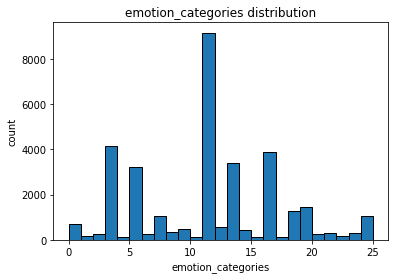

In [141]:
emotion_categories = np.concatenate( df_train['Emotions_Categorical'])
plot_histogram(np.histogram(emotion_categories,25),'emotion_categories','count','emotion_categories distribution')


In [139]:
np.histogram(emotion_categories,25)


(array([ 700,  165,  278, 4136,  129, 3237,  252, 1043,  368,  489,  113,
        9161,  573, 3397,  429,  139, 3875,  135, 1266, 1477,  270,  294,
         192,  299, 1041], dtype=int64),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.]))

In [16]:
path_save_annotation = 'D:/DataSets/Emotic/Annotations/Annotations.csv'

df_train.to_csv(path_save_annotation)

In [107]:
from PIL import Image,ImageOps

df_train.keys()


Index(['file_names', 'folder_names', 'n_col', 'n_row', 'person_bbox_x1',
       'person_bbox_y1', 'person_bbox_x2', 'person_bbox_y2',
       'Emotions_Categorical', 'Emotions_Continuous_valence',
       'Emotions_Continuous_arousal', 'Emotions_Continuous_dominance',
       'genders', 'ages'],
      dtype='object')

In [150]:
import os
def get_image_data(df,image_name):
    db = df.set_index(['file_names'])
    return db.loc[image_name]

def get_image_path(df,image_name):
    img_data = get_image_data_by_name(df,image_name)
    return img_data,os.path.join(DIR_PATH, img_data['folder_names'])

def load_image(df,image_name):
    img_data,path = get_image_path(df,image_name)
    return img_data, Image.open(os.path.join(path,image_name))


In [219]:

img_data, img = load_image(df_train,'frame_k7fb824vh221kl3j.jpg')


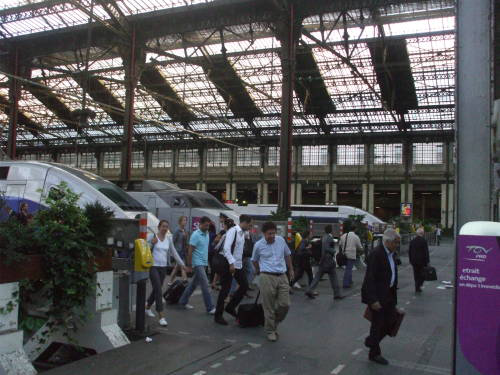

In [220]:
img

In [221]:
x1=img_data['person_bbox_x1']
y1=img_data['person_bbox_y1']
x2=img_data['person_bbox_x2']
y2=img_data['person_bbox_y2']

(x1, y1, x2, y2) , img.size

((245.0, 227.0, 293.0, 340.0), (500, 375))

In [222]:

w,h =img.size
area = (x1, y1, w-x2, h-y2)

cimg =ImageOps.crop(img, area )
cimg.size

(48, 113)

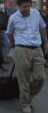

In [223]:
cimg